In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [5]:
path = 'example_data/'
biases = []
for i in range(1,11):
    zeros = (8-len(str(i)))*'0'
    biases.append(fits.getdata(path+'tBias'+zeros+'{}.fit'.format(i) , ext=0).astype(np.int))
    
avg_bias = np.asarray(biases).mean(axis=0)
pathL = 'data/'

In [6]:
#creates an array
lamp_on = [] 
lamp_off = []
sun_on = [] 
sun_off = []


In [9]:

#organizes the array
for i in range(11,16):
    zeros = (8-len(str(i)))*'0'
    sun_on.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
for i in range(16,21):
    zeros = (8-len(str(i)))*'0' 
    sun_off.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
for i in range(2,4):
    zeros = (8-len(str(i)))*'0' 
    lamp_on.append(fits.getdata(pathL+'Q'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
for i in range(5,7):
    zeros = (8-len(str(i)))*'0' 
    lamp_off.append(fits.getdata(pathL+'Q'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))


In [10]:
#gets the biases of the lamp

lamp_on_sub_bias = [lamp - avg_bias for lamp in lamp_on]
lamp_off_sub_bias = [lamp - avg_bias for lamp in lamp_off] 
sun_on_sub_bias = [sun - avg_bias for sun in sun_on] 
sun_off_sub_bias = [sun - avg_bias for sun in sun_off]
avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0) 
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)


In [12]:
#you need to correct for the background frame because they will give some lines you do not want
lamp_corrected = [lamp_on - avg_lamp_off for lamp_on in lamp_on_sub_bias]
sun_corrected = [sun_on - avg_sun_off for sun_on in sun_on_sub_bias]
avg_lamp = np.asarray(lamp_corrected).mean(axis=0) 
avg_sun = np.asarray(sun_corrected).mean(axis=0)


In [23]:
#image of neon lamp emisson lines
plt.imshow(avg_lamp)
plt.xlabel('Pixels x') 
plt.ylabel('Pixels y') 

Text(0,0.5,'Pixels y')

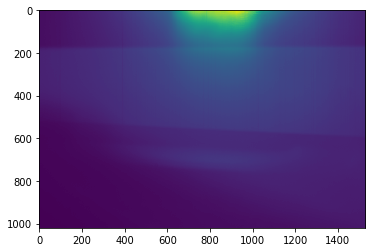

In [14]:
#image of the sun spectrum
plt.imshow(avg_sun)
plt.show()
plt.xlabel('Pixels x') 
plt.ylabel('Pixels y') 

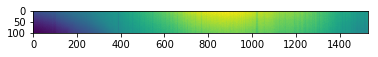

In [15]:
#takes slice of image of the sun spectra
plt.imshow(avg_sun[400:500,:])

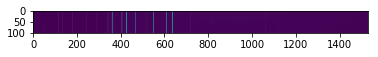

In [16]:
#takes slice of image of the neon spectra
plt.imshow(avg_lamp[400:500,:])

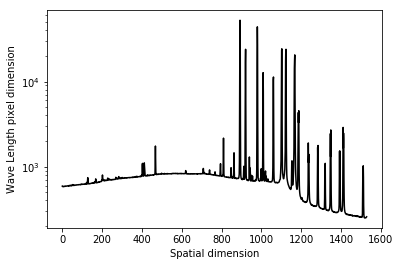

In [27]:
#with out calibration of known emission lines to find the stretch and the shift
lamp_good = np.asarray(avg_lamp[400:500,:]).mean(axis=0)#Averages the value along each column 
#creates plot of the lamp with spatial dimension vs flux
plt.semilogy(np.flip(np.arange(len(lamp_good)),0), lamp_good, 'k-') #np.flip(~~~) r 
 
plt.xlabel('Spatial dimension') 
plt.ylabel('Wave Length pixel dimension') 
plt.show()

6.329113924050633


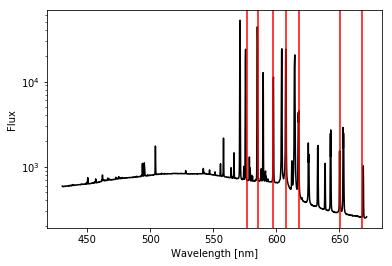

In [31]:
lamp_good = np.asarray(avg_lamp[400:500,:]).mean(axis=0)#Averages the value along each column 


#known wavelenghts of emmison lines in neon
neon_lines = [650.6,618.2,585.2,597.5,576.4,607.4,667.828]#in nanometers 
#values to calibrate the image based on the known neon lines.
stretch=.158 
shift=430
#creates a plot of the spectrum with y as log this is the neon lamp 
plt.semilogy(np.flip(np.arange(len(lamp_good)),0)*stretch+shift, lamp_good, 'k-') #np.flip(~~~) r 
for line in neon_lines:
    plt.axvline(line,color='r') 
    
#creates label for the graph
plt.xlabel('Wavelength [nm]') 
plt.ylabel('Flux') 
plt.show()


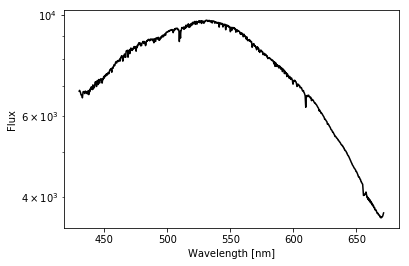

In [32]:
#array of the sun values
sun_good = np.asarray(avg_sun[400:500,:]).mean(axis=0)


#found off of previous graph
stretch=.158 
shift=430
#plots a spectrum with y as a log
plt.semilogy(np.flip(np.arange(len(sun_good)),0)*stretch+shift, sun_good, 'k-') #np.flip(~~~) rev 

#graph labels
plt.xlabel('Wavelength [nm]') 
plt.ylabel('Flux') 
plt.show()


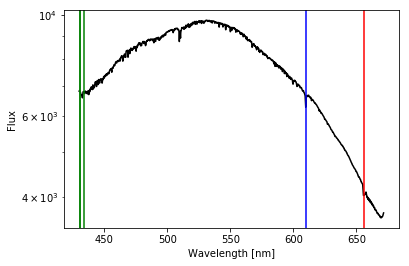

In [53]:
#array of the sun values
sun_good = np.asarray(avg_sun[400:500,:]).mean(axis=0)
#Fraunhofer lines 
C = [656.281] 
Unknown = [610]
G_group = [430.79,430.774,434.047]
#Fraunhofer lines 
#found off of previous graph
stretch=.158 
shift=430

plt.semilogy(np.flip(np.arange(len(sun_good)),0)*stretch+shift, sun_good, 'k-') #np.flip(~~~) rev 

for line in C:
    plt.axvline(line,color='r') 
for line in Unknown:
    plt.axvline(line,color='b')
for line in G_group:
    plt.axvline(line,color='g')
plt.xlabel('Wavelength [nm]') 
plt.ylabel('Flux') 
plt.show()